# The DataTables Arguments

ITables is a wrapper for the Javascript [DataTables](https://datatables.net/) library, which has a great [documentation](https://datatables.net/), a huge collection of [examples](https://datatables.net/examples/index), and a useful [forum](https://datatables.net/forums/).

Below we give a series of examples of how the DataTables examples can be ported to Python with `itables`.

As always, we initialize the `itables` library with


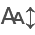

In [1]:
from itables import init_notebook_mode, show

init_notebook_mode(all_interactive=True)

Then we create two sample dataframes:

In [2]:
import pandas as pd

from itables.sample_dfs import get_countries

df_small = pd.DataFrame({"a": [2, 1]})
df = get_countries(html=False)

In [3]:
import itables.options as opt

opt.lengthMenu = [5, 10, 20, 50, 100, 200, 500]

```{tip}
The rocket icon at the top of the page will let you run this notebook in Binder!
```

## Caption

You can set additional `tags` on the table like e.g. a [caption](https://datatables.net/blog/2014-11-07):

In [4]:
show(df, "Countries from the World Bank Database")

The caption appears at the bottom of the table by default (except
in Jupyter Book). This is governed by `caption-side:bottom`
in the [`style` option](style).

You can also override the location of the caption in the caption tag itself:

In [5]:
show(
    df,
    tags='<caption style="caption-side: bottom">Countries from the World Bank Database</caption>',
)

(layout)=
## Table layout

By default, datatables that don't fit in one page come with a search box, a pagination control, a table summary, etc.
You can select which elements are actually displayed using
DataTables' [`layout` option](https://datatables.net/reference/option/layout) with e.g.:

In [6]:
show(df_small, layout={"topStart": "search", "topEnd": None})

The available positions are `topStart, topEnd, bottomStart, bottomEnd`. You can also use `top2Start`, etc... (see more
in the [DataTables documentation](https://datatables.net/reference/option/layout)).

Like for the other arguments of `show`, you can change the default value of the dom option with e.g.:

```
import itables.options as opt

opt.layout =  {
    "topStart": "pageLength",
    "topEnd": "search",
    "bottomStart": "info",
    "bottomEnd": "paging"
}  # (default value)
```

```{tip}
The `layout` option was introduced with `itables==2.0` and `DataTables==2.0`
and deprecates the former [`dom` option](https://datatables.net/reference/option/dom).
If you wish to continue using the `dom` option, set `opt.warn_on_dom = False`.
```

## Search

The [search option](https://datatables.net/reference/option/search) let you control the initial value for the search field, and whether the query should be treated as a regular expression or not:

In [7]:
show(df, search={"regex": True, "caseInsensitive": True, "search": "s.ain"})

## Pagination

### How many rows per page

Select [how many entries](https://datatables.net/examples/advanced_init/length_menu.html) should appear at once in the table with either the `lengthMenu` argument of the `show` function, or with the global option `itables.options.lengthMenu`:

In [8]:
show(df, lengthMenu=[2, 5, 10, 20, 50])

### Show the table in full

Use [`paging=False`](https://datatables.net/reference/option/paging) to show the table in full:

In [9]:
show(df.head(8), paging=False)

### Scroll

You can replace the pagination with a [vertical scroll](https://datatables.net/examples/basic_init/scroll_y.html):

In [10]:
show(df, scrollY="200px", scrollCollapse=True, paging=False)

In the context of the notebook, a horizontal scroll bar should appear when the table is too wide. In other contexts like here in Jupyter Book, you might want to use `scrollX = True`.

## Footer

Use `footer = True` if you wish to display a table footer.

In [11]:
show(df, footer=True)

## Column filters

Use `column_filters = "header"` or `"footer"` if you wish to display individual column filters
(remove the global search box with a [`layout`](layout) modifier if desired).

In [12]:
alpha_numeric_df = pd.DataFrame(
    [["one", 1.5], ["two", 2.3]], columns=["string", "numeric"]
)

show(alpha_numeric_df, column_filters="footer", layout={"topEnd": None})

As always you can set activate column filters by default with e.g.

In [13]:
opt.column_filters = "footer"

Column filters also work on dataframes with multiindex columns:

In [14]:
from itables.sample_dfs import get_dict_of_test_dfs

get_dict_of_test_dfs()["multiindex"]

A       B    
      1   2   1   2
C 3   0   1   2   3
  4   4   5   6   7
D 3   8   9  10  11
  4  12  13  14  15

In [15]:
opt.column_filters = False

## Row order

Since `itables>=1.3.0`, the interactive datatable shows the rows in the same order as the original dataframe:

In [16]:
from itables.sample_dfs import get_dict_of_test_dfs

for name, test_df in get_dict_of_test_dfs().items():
    if "sorted" in name:
        show(test_df, tags=f"<caption>{name}</caption>".replace("_", " ").title())

You can also set an explicit [`order`](https://datatables.net/reference/option/order) argument:

In [17]:
sorted_df = pd.DataFrame({"i": [1, 2], "a": [2, 1]}).set_index(["i"])
show(sorted_df, order=[[1, "asc"]])

## Showing the index

By default, the index of a Series/DataFrame is shown only when it is not trivial, i.e. when
it has a name, or when it differs from a range index. If you prefer, you can change the value of
`showIndex` to either `True` or `False` to always or never show the index (the default value being `"auto"`).

You can change this behavior globally with e.g.
```python
import itables.options as opt

opt.showIndex = True
```

or locally by passing an argument `showIndex` to the `show` function:

In [18]:
df_with_range_index = pd.DataFrame({"letter": list("abcd")})
show(df_with_range_index, showIndex=True)